In [56]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [57]:
#Load Dataset
df=pd.read_csv('wireless_churn.csv')
df.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,0


In [58]:
#Show Key Statistics
df.describe()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294,0.144914
std,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000
25%,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000,0.000000
50%,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000,0.000000
75%,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000,0.000000
max,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000,1.000000


Class Split
0    2850
1     483
Name: Churn, dtype: int64


Text(0, 0.5, 'Count')

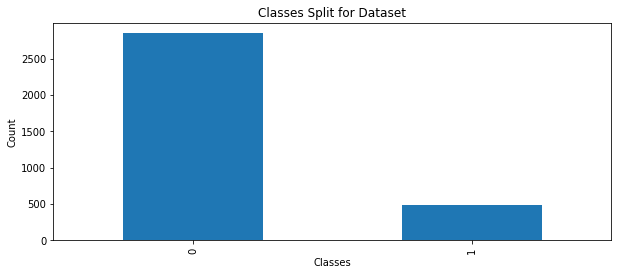

In [59]:
 #Class Balance
print('Class Split')
print(df['Churn'].value_counts())
df['Churn'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccountWeeks     3333 non-null   int64  
 1   ContractRenewal  3333 non-null   int64  
 2   DataPlan         3333 non-null   int64  
 3   DataUsage        3333 non-null   float64
 4   CustServCalls    3333 non-null   int64  
 5   DayMins          3333 non-null   float64
 6   DayCalls         3333 non-null   int64  
 7   MonthlyCharge    3333 non-null   float64
 8   OverageFee       3333 non-null   float64
 9   RoamMins         3333 non-null   float64
 10  Churn            3333 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [ ]:
#Create Profile Report
%pip install pandas_profiling --upgrade    
#Importing package
import pandas_profiling as pp
from IPython.display import IFrame
 
# Profile Report
wireless = pp.ProfileReport(df)
wireless.to_file('wireless.html')
display(IFrame('wireless.html', width=900, height=350))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 325 kB 14.9 MB/s 
     |████████████████████████████████| 102 kB 73.0 MB/s 
     |████████████████████████████████| 9.9 MB 55.2 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 679 kB 35.4 MB/s 
     |████████████████████████████████| 4.7 MB 48.0 MB/s 
     |████████████████████████████████| 296 kB 58.7 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=549155b3feeea140a2da46871e8f1c4b62a333f5fdf064b164d984b11d1f47a6
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
  Attempting uninstall: statsmodels
    Found 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [61]:
#Define x and y variable
x = df.drop('Churn',axis=1).to_numpy()
y = df['Churn'].to_numpy()

#Prepare for Models for Comparison

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify=y,random_state = 100)


In [62]:
# Use built-in isolation forest
from sklearn.ensemble import IsolationForest

# The prediction returns 1 if sample point is inlier. If outlier prediction returns -1
clf_all_features = IsolationForest(random_state=100)
clf_all_features.fit(x_train)

#Predict if a particular sample is an outlier using all features for higher dimensional data set.
y_pred_train = clf_all_features.predict(x_train)
y_pred_train2 =np.array(list(map(lambda x: x == 1, y_pred_train)))

# Exclude suggested outlier samples for improvement of prediction power/score
x_train_mod = x_train[y_pred_train2, ]
y_train_mod = y_train[y_pred_train2, ]

#Size of Datasets
print('Original Train Dataset Size : {}'.format(len(x_train)))
print('New Train Dataset Size      : {}'.format(len(x_train_mod)))



Original Train Dataset Size : 2666
New Train Dataset Size      : 2124


In [63]:
#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train_mod,y_train_mod)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train_mod)
x_test2 = sc.fit_transform(x_test)

x_2 = sc.fit_transform(x)

#Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [64]:
#Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(solver='lbfgs',class_weight='balanced',
                                               random_state=100))])
pipeline.insert(0,pipe_logreg)

pipe_gnb = Pipeline([('scl', StandardScaler()),
                    ('clf', GaussianNB())])
pipeline.insert(1,pipe_gnb)

#Set grid search params 

modelpara =[]

param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l2']}
modelpara.insert(0,param_gridlogreg)


param_gridgnb = {}
modelpara.insert(1,param_gridgnb)




In [65]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train_mod, 
                                                            y=y_train_mod,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='recall_weighted',random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.ylim([0.5, 1.01])
    plt.show()

Logistic Regression - Learning Curve


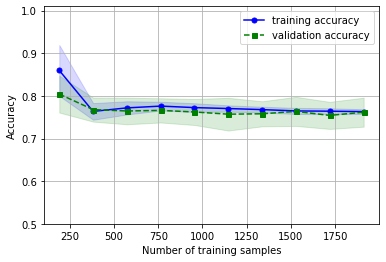

Naive Bayes - Learning Curve


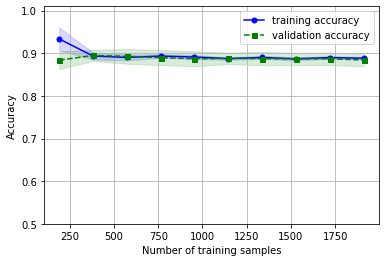

In [66]:
print('Logistic Regression - Learning Curve')
plot_learning_curves(pipe_logreg)
print('Naive Bayes - Learning Curve')
plot_learning_curves(pipe_gnb)

Model Evaluation - Accuracy Score
Logistic Regression 0.76 +/- 0.03
Naive Bayes 0.89 +/- 0.02




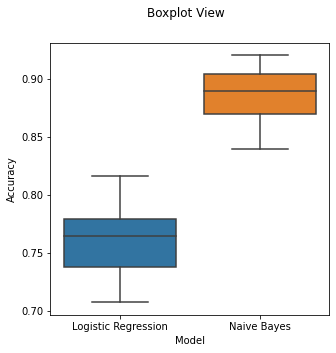

In [67]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Logistic Regression',pipe_logreg))
models.append(('Naive Bayes',pipe_gnb))

#Model Evaluation
results =[]
names=[]
scoring ='accuracy'
print('Model Evaluation - Accuracy Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x_train_mod,y_train_mod,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

fig = plt.figure(figsize=(5,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

In [68]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, cv=cv2,scoring='recall_weighted')
    gs_clf = gs_clf.fit(x_train, y_train)
    model = gs_clf.best_estimator_
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test)
    
    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
        
    #Output Validation Statistics
    target_names=['Outcome 0','Outcome 1']
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred,target_names=target_names)) 
        
    #Transform the variables into binary (0,1) - ROC Curve
    from sklearn import preprocessing
    Forecast1=pd.DataFrame(y_pred)
    Outcome1=pd.DataFrame(y_test)
    lb1 = preprocessing.LabelBinarizer()
    OutcomeB1 =lb1.fit_transform(Outcome1)
    ForecastB1 = lb1.fit_transform(Forecast1)
    
    #Setup the ROC Curve
    from sklearn.metrics import roc_curve, auc
    from sklearn import metrics
    fpr, tpr, threshold = metrics.roc_curve(OutcomeB1, ForecastB1)
    roc_auc = metrics.auc(fpr, tpr)
    print('ROC Curve')
    #Plot the ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show() 


Optimized Model

Model Name: LogisticRegression(class_weight='balanced', random_state=100)

Best Parameters: {'clf__C': 0.01, 'clf__penalty': 'l2'}

 [[430 140]
 [ 24  73]]

               precision    recall  f1-score   support

   Outcome 0       0.95      0.75      0.84       570
   Outcome 1       0.34      0.75      0.47        97

    accuracy                           0.75       667
   macro avg       0.64      0.75      0.66       667
weighted avg       0.86      0.75      0.79       667

ROC Curve


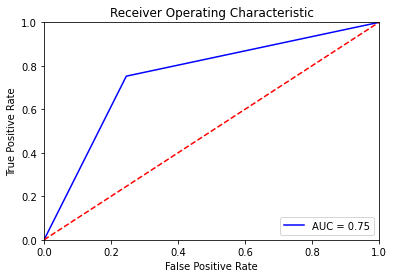


Optimized Model

Model Name: GaussianNB()

Best Parameters: {}

 [[520  50]
 [ 57  40]]

               precision    recall  f1-score   support

   Outcome 0       0.90      0.91      0.91       570
   Outcome 1       0.44      0.41      0.43        97

    accuracy                           0.84       667
   macro avg       0.67      0.66      0.67       667
weighted avg       0.83      0.84      0.84       667

ROC Curve


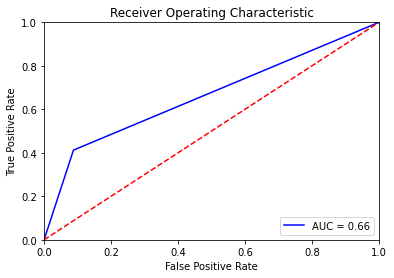

In [69]:
#Run Models

for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)

In [73]:
#Create Voting Model - Sklearn
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.ensemble import BaggingClassifier

estimators = []

model1 = LogisticRegression(solver='lbfgs',class_weight='balanced',
                            random_state=100)
estimators.append(('Logistic', model1))

model2 = GaussianNB()
estimators.append(('Naive Bayes', model2))

voting_clf=VotingClassifier(estimators,voting='soft')

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro'}
print('\nVoting Model')
for clf in (model1,model2,voting_clf):
    rkfcv= clf.fit(x_train2,y_train_mod)
    ens_rkf1 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    rKFcv = cross_validate(rkfcv, x_2, y, scoring=scoring, cv=ens_rkf1)
    print(clf.__class__.__name__,round(rKFcv['test_rec_macro'].mean(),2))   


Voting Model
LogisticRegression 0.76
GaussianNB 0.67
VotingClassifier 0.72


In [75]:
#Create Stacking Model-Sklearn
from sklearn.ensemble import StackingClassifier

#Identify Models
lr = LogisticRegression(solver='lbfgs',class_weight='balanced',
                        random_state=100)

estimators2 = []

mod1 = GaussianNB()
estimators2.append(('Naive Bayes', mod1))

mod2 = BaggingClassifier(random_state=100)
estimators2.append(('Bagging', mod2))

#Create Stacking Classifier
stackmod=StackingClassifier(estimators=estimators2,
                             final_estimator=lr)

scoring2 = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro'}

print('\nStacking Model')
for clf in (mod1,mod2,stackmod):
    rkfcv2= clf.fit(x_train2,y_train_mod)
    ens_rkf2 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    rKFcv2 = cross_validate(rkfcv2, x_2, y, scoring=scoring2, cv=ens_rkf2)
    print(clf.__class__.__name__,round(rKFcv2['test_rec_macro'].mean(),2)) 


Stacking Model
GaussianNB 0.67
BaggingClassifier 0.8
StackingClassifier 0.85
